In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

r=requests.get('https://www.ak-bars.ru/statistics/')
soup=BeautifulSoup(r.text,'lxml')
tables=soup.find_all('table')
tables=tables[0]
rows=tables.find_all('tr')
heading=rows[0]

In [2]:
k=1
players=[]
while k<=len(rows)-1:
    data=rows[k].find_all('td')
    c_data=BeautifulSoup(str(data),'lxml').get_text()
    players.append(c_data)
    k=k+1
AB=pd.DataFrame(players)

In [3]:
AB=AB[0].str.split(',',expand=True)
AB[0]=AB[0].str.replace('[','')
AB[25]=AB[25].str.replace(']','')
heads=heading.find_all('th')
dfh=[]
for head in heads:
    ex=BeautifulSoup(str(head),'lxml').get_text().replace('\n','')
    ex=ex.split()[0]
    dfh.append(ex)
AB.columns=dfh

In [4]:
AB['№']=AB['№'].astype('int')
AB['Имя']=AB['Имя'].str.replace('\n','')
AB[['И','Ш','А','О','+/-','+','-','Штр','ШР','ШБ','ШМ','ПГ','РБ','БВ','Вбр','ФоП','СПр','БлБ']]=AB[['И','Ш','А','О','+/-','+','-','Штр','ШР','ШБ','ШМ','ПГ','РБ','БВ','Вбр','ФоП','СПр','БлБ']].apply(pd.to_numeric,errors='coerce')
AB[['%БВ','%Вбр','См/И','БВ/И']]=AB[['%БВ','%Вбр','См/И','БВ/И']].apply(pd.to_numeric,errors='coerce')
AB.fillna(0,inplace=True)
            
AB['ВП/И']=pd.to_datetime(AB['ВП/И'].str.lstrip().str.rstrip(),format='%M:%S').dt.time
AB['Имя']=AB['Имя'].str.lstrip(' ')

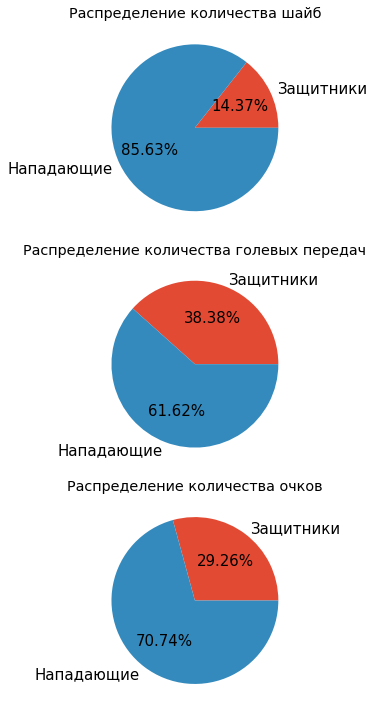

In [5]:
AB.to_excel('Ak_Bars_stat.xlsx',index=False)
plt.style.use('ggplot')
fig,axes=plt.subplots(3,1)
AB.groupby('Поз.')['Ш'].sum().plot.pie(labels=['Защитники','Нападающие'],autopct='%.2f%%',figsize=(10,10),fontsize=15,ax=axes[0])
AB.groupby('Поз.')['А'].sum().plot.pie(ax=axes[1],labels=['Защитники','Нападающие'],autopct='%.2f%%',figsize=(10,10),fontsize=15)
AB.groupby('Поз.')['О'].sum().plot.pie(ax=axes[2],labels=['Защитники','Нападающие'],autopct='%.2f%%',figsize=(10,10),fontsize=15)
axes[0].set_title('Распределение количества шайб')
axes[1].set_title('Распределение количества голевых передач')
axes[2].set_title('Распределение количества очков')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
fig.tight_layout()